In [4]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [8]:
grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

start = (0,0)
goal = (0,19)

In [6]:
def heuristic(a, b): #유클리드 거리 계산법
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def Astar(array, start, goal):
    nbors = [ #주변 위치에 대한 좌표들
        (0,1),
        (0,-1),
        (1,0),
        (-1,0),
        (1,1),
        (1,-1),
        (-1,1),
        (-1,-1),
    ]
    close_set = set()
    came_from = {}
    gscore = {start:0} # 지난 경로에 대한 score
    fscore = {start:heuristic(start, goal)} # 남은 경로에 대한 거리 : 휴리스틱 --> 거리 계산
    
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1] #최소 거리에 있는 노드 get
        if current == goal: #현재 노드가 목적지이면
            data = []
            while current in came_from:
                data.append(current) 
                current = came_from[current]
            return data
        
        close_set.add(current)
        for i, j in nbors:
            n = current[0] + i , current[1] + j #주변 노드 탐색
            if 0 <= n[0] < array.shape[0]: # 주변 노드의 위치가 올바른 범위인지 체크
                if 0 <= n[1] < array.shape[1]:
                    if array[n[0]][n[1]] == 1:
                        continue
                else:
                    continue
            else: 
                continue
            #해당 안되면 건너뜀        
            temp_g_score = gscore[current] + heuristic(current, n)
            if n in close_set and temp_g_score >= gscore.get(n, 0): #이미 방문을 햇으면서 기존 값보다 더 크면 사용 x
                continue #dict.get(key, default value) 해당 key가 없으면 default 값을 return

            if temp_g_score < gscore.get(n, 0) or n not in [i[1] for i in oheap]: # 기존 값보다 작거나 방문을 안햇으면 사용
                came_from[n] = current
                gscore[n] = temp_g_score
                fscore[n] = temp_g_score + heuristic(n, goal)
                heapq.heappush(oheap, (fscore[n], n))
    return False

경로 : [(0, 0), (1, 1), (2, 1), (3, 2), (4, 2), (5, 2), (6, 3), (7, 4), (8, 5), (9, 5), (10, 5), (11, 5), (12, 4), (13, 3), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (19, 13), (18, 14), (17, 14), (16, 14), (15, 14), (14, 14), (13, 13), (13, 12), (13, 11), (12, 10), (11, 11), (10, 12), (10, 13), (9, 14), (9, 15), (8, 16), (7, 17), (6, 18), (5, 18), (4, 18), (3, 18), (2, 18), (1, 19), (0, 19)]


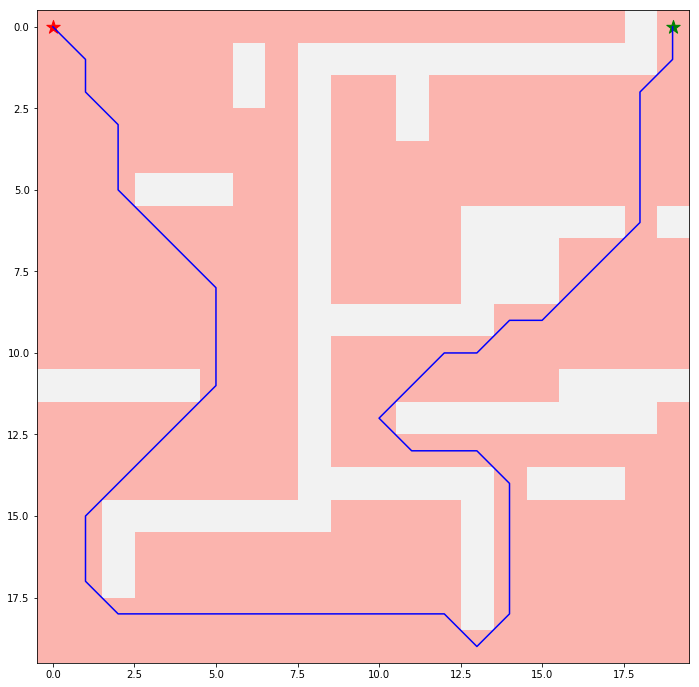

In [9]:
route = Astar(grid, start, goal)
route = route + [start] #출발위치 추가
route = route[::-1] #역순으로 변환

print('경로 :', route)

x_coords = []
y_coords = []

for i in (range(0, len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)
    
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap = plt.cm.Pastel1)
ax.scatter(start[1], start[0], marker = '*', color = 'red', s = 200)
ax.scatter(goal[1], goal[0], marker = '*', color = 'green', s = 200)
ax.plot(y_coords, x_coords, color = 'blue')
plt.show()